<div style="border:solid Chocolate 2px; padding: 40px">

Сергей, привет, меня зовут Станислав Коротченко, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это неудобно - дай знать, и мы перейдем на «вы».
Это учебный проект и здесь не стоит бояться делать ошибки, я хочу поделиться своим опытом и помочь тебе стать аналитиком данных.
Уже выполнена большая работа над проектом, давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий с замечанием ревьюера:</b> Так выделены самые важные замечания. Как только ты их исправишь проект будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий с небольшим замечанием или советом ревьюера:</b> Так выделены небольшие замечания или советы. 
</div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера

<div class="alert alert-success">

Проделана хорошая аналитическая работа. Код написан чисто, соблюдена структура проекта, графики оформлены корректно и написаны логичные и обоснованные выводы. Проект выполнен на хорошем аналитическом уровне, поэтому замечаний не много. Я отметил в проекте моменты, на которые необходимо обратить внимание, исправь их и проект будет принят.

- по ссылкам ниже интересные материалы по А/В тестам
  
    
https://habr.com/ru/company/avito/blog/571094/

https://habr.com/ru/company/yandex/blog/476826/

https://academy.yandex.ru/journal/kak-provesti-a-b-testirovanie-6-prostykh-shagov

https://habr.com/ru/company/yandex/blog/342704/

https://r-analytics.blogspot.com/2013/10/blog-post_13.html 

</div>

<div class="alert alert-danger">

- добавь, пожалуйста, формулировку нулевой и альтернативной гипотез
</div>




<div class="alert alert-info"> <b>Привет, Станислав! Спасибо за проверку и оценку моего проекта!</b> .</div>


<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера в2

<div class="alert alert-success">

Отлично, замечания исправлены корректно, работу принимаю и желаю успеха в следующих проектах

# Принятие решений в бизнесе

### Цель проекта
- Приоритизировать гипотезы

- запустить A/B-тест

- проанализировать результаты. 

### Описание полученных данных
- Данные по гипотезам (Файл: hypothesis.csv)

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

- Датасет заказов интернет-магазина (Файл: orders.csv)

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

- Датасет посещения посетителей интернет-магазина (Файл: visitors.csv)

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Ход исследования
- Провека данных на полноту, предобработка и анализ


- Приоритизация гипотез.



- Анализ A/B-теста


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
    
Здорово, что описана цель проекта, описаны данные и выделено содержание.


## Проверка данных и их предобработка

In [1]:
# добавим библиотеки библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import warnings

from scipy import stats as st

In [2]:
# прочитаем исходные файлы Заказчика
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )


except:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
    )

In [3]:
#Проанализируем данные о гипотезах

hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b> 
    
Чтобы названия гипотез выводились целиком, используй настройку pd.set_option('display.max_colwidth', False)
 </div>


In [4]:
#Проанализируем данные о заказах
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [5]:
#Проанализируем данные о посетителях

visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


#### Выводы:
Проанализировав исходные данные, мы видим, что пропусков нет. Тип данных в столбцах не корректный, к примеру тип данных даты записан как object. Проверим данные на наличие дубликатов и приведем все наименования столбцов к единому стилю и нижнему регистру.

## Предобработка данных

In [6]:
# приведем к единому стилю

hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

display(hypothesis.columns)
orders.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [7]:
#поменяем столбцы где фигурируют даты к верному формату

visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [8]:
# проверим данные на наличие дубликатов

display(hypothesis.duplicated().sum())
display(visitors.duplicated().sum())
display(orders.duplicated().sum())

0

0

0

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Данные корректно подготовлены к работе.
</div>


<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b>

Чтобы лучше изучить данные можешь посмотреть:

-  сколько у нас групп в АВ-тесте;
-  даты начала и окончания теста; 
-  не попадают ли какие-то пользователи в обе группы - по таблице с заказами. 
 
</div>


## Приоритизация гипотез


Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [9]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).head(5)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000


<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b> 

Для удобства можно округлить значения в колонке ICE до 2 знаков после запятой. 
</div>


Составлен список ТОП-5 гипотез которым надо уделить основное внимание.

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [10]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False).head(5)

,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2


Применив фреймворк RICE для приоритизации гипотез мы видим, что гипотезы выстраились в точности до наоборот. Но все теже входят в  ТОП 5.

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE.

In [11]:
hypothesis[['hypothesis','ice', 'rice']].sort_values(by='rice', ascending=False).head(5)

,hypothesis,ice,rice
7,Добавить форму подписки на все основные страни...,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.200000,16.2


Топ гипотез по ICE - 8,0 и 7. 

Топ гипотез по RICE - 7,2 и 0. 

ICE в отличии от RICE не учитывает охват изменений, но это важная оценка гипотезы. Исходя из этого, в нашем случае приоритетными будут гипотезы 7,2,0.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Гипотезы проанализированы верно, молодец.

Здорово, что указано на изменение приоритетов при учете охвата.
</div>


## Анализ A/B Теста


Построим график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [12]:
#уникальные значения дат и групп
datesGroups = orders [['date', 'group']].drop_duplicates()

#кумулятивные показатели orders
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#кумулятивные показатели visitors
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


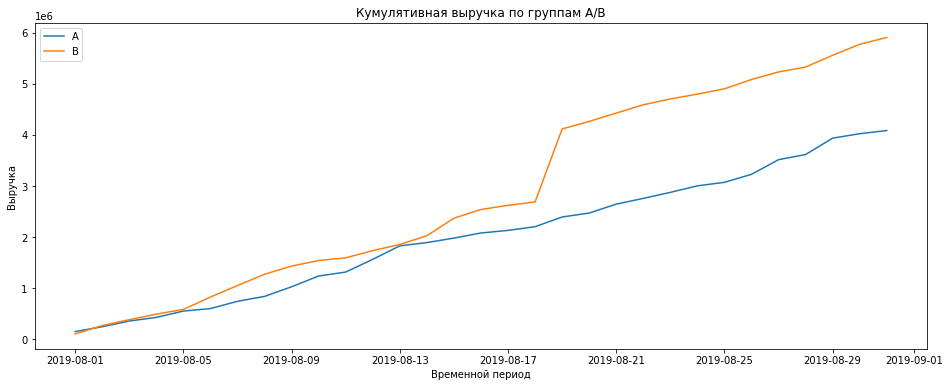

In [13]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(16,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label = 'B')

plt.ylabel('Выручка')
plt.xlabel('Временной период')
plt.title('Кумулятивная выручка по группам A/B')
plt.legend()
plt.show()

На графике видно, что группа B показывает большую выручку чем группа А.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Верно
</div>


Построим график кумулятивного среднего чека по группам.

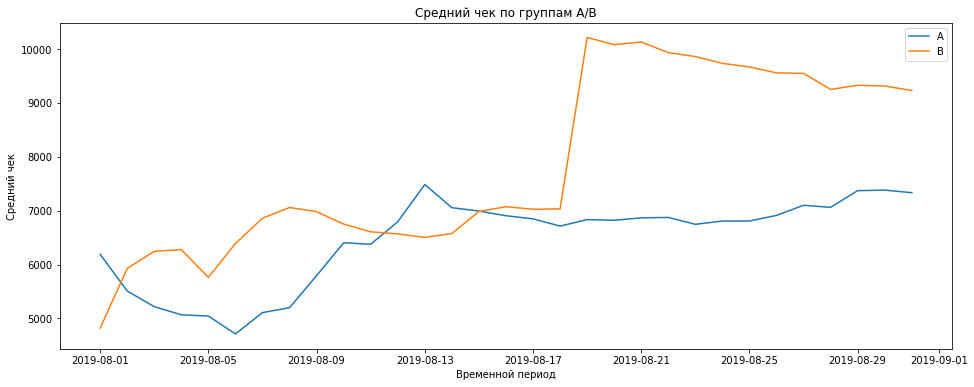

In [14]:
plt.figure(figsize=(16,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['orders'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['orders'], label = 'B')

plt.title('Средний чек по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Временной период')
plt.legend()
plt.show()

По началу графики показывают нам, что ср.чек группы B был выше А, но в середине временного отрезка идет высокий скачек группы B вверх, произойти это могло из-за большого заказа или же мы сталкнулись с аномалиями.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
График интерпретирован верно, здорово, что выдвинуто предположение природы появления всплеска.
</div>


Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

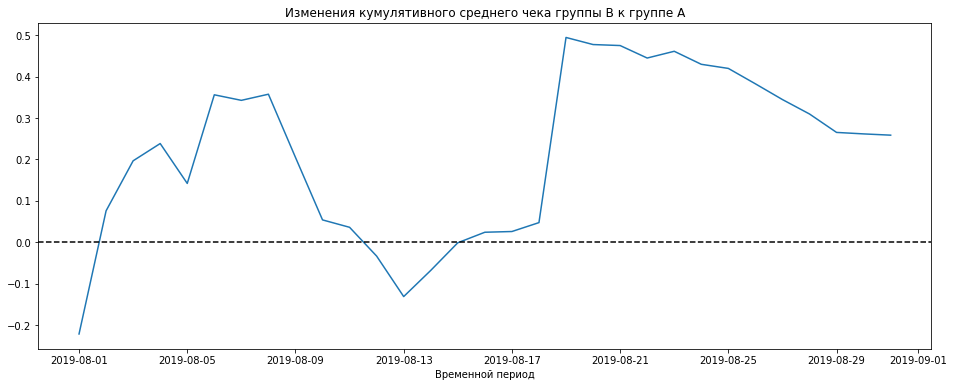

In [15]:
generalCumulativeData = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', suffixes=['A', 'B'])

plt.figure(figsize=(16,6))
plt.plot(generalCumulativeData['date'], ((generalCumulativeData['revenueB']/generalCumulativeData['ordersB'])/(generalCumulativeData['revenueA']/generalCumulativeData['ordersA'])-1))
plt.axhline(y=0, color='black', linestyle = '--')

plt.title('Изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Временной период')
plt.show()

График скачет в нескольких точках,при этом скачки слишком резкие, предполагаем что это все таки большие заказы либо аномалии.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Сначала средний чек группы B стабильно растет, потом резко падает и снова растет. Согласен, влияние крупных заказов.   
</div>


Построим график кумулятивного среднего количества заказов на посетителя по группам.

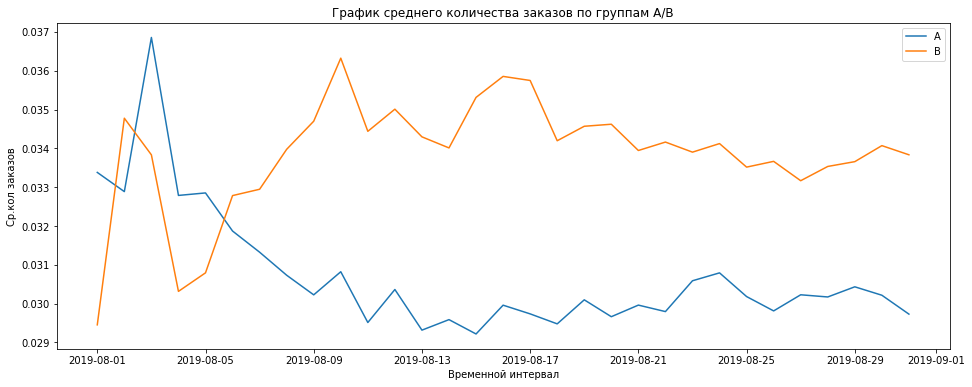

In [16]:
generalCumulativeData['conversionA'] =  generalCumulativeData['ordersA'] / generalCumulativeData['visitorsA'] 
generalCumulativeData['conversionB'] =  generalCumulativeData['ordersB'] / generalCumulativeData['visitorsB']

plt.figure(figsize=(16,6))
plt.plot(generalCumulativeData['date'], generalCumulativeData['conversionA'], label='A')
plt.plot(generalCumulativeData['date'], generalCumulativeData['conversionB'], label='B')

plt.title('График среднего количества заказов по группам A/B')
plt.xlabel('Временной интервал')
plt.ylabel('Ср.кол заказов')
plt.legend()
plt.show()

Группа B показывает большие результаты, чем группа А.


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Все верно, среднее количество заказов группы В продолжает выигрывать до конца.  
    
Как ты считаешь: была ли стабилизация результатов или нет?    
</div>


Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

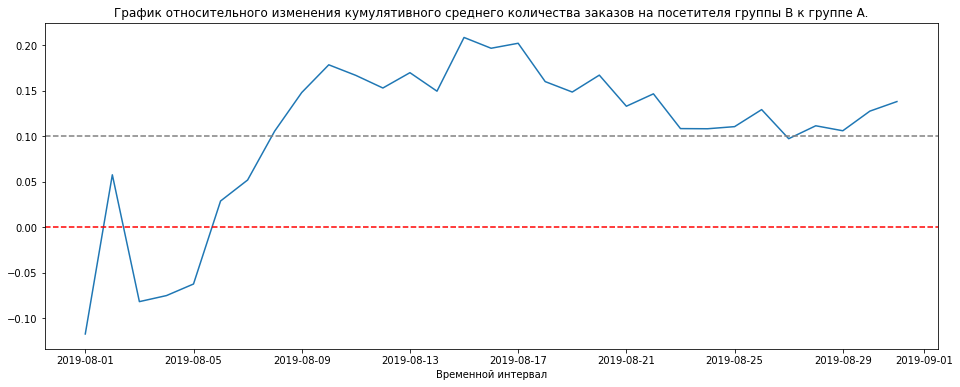

In [17]:
plt.figure(figsize=(16,6))
plt.plot(generalCumulativeData['date'], ((generalCumulativeData['conversionB']/generalCumulativeData['conversionA'])-1))

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('Временной интервал')
plt.show()

С 1 авгста по 5 количество заказов "A" было больше на 5-10% кроме  2 августа - был сильный рост конверсии в группе "B" и по итогу дня результат "B" был на 5% больше "A"

Начиная с 6 августа группа "B" лидировала до конца периода. Рост был до 15 августа и разница с "A" на максимуме был 21%, после снизился до 10%-14%.*

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Все верно, здорово, что для анализа была использована axhline.


Построим точечный график количества заказов по пользователям.

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

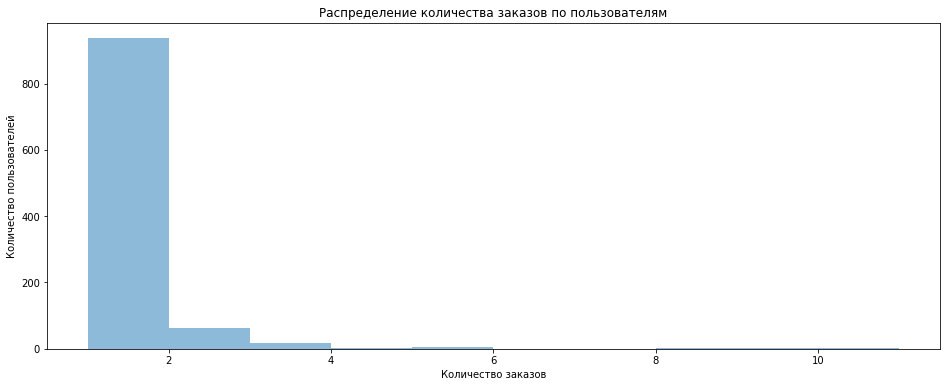

In [18]:
plt.figure(figsize=(16,6))
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns =  ['visitor_id', 'orders']
display(orders_by_users['orders'].describe())

# строим гистограмму
plt.hist(orders_by_users['orders'], alpha=0.5) 
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

Большинсво делают по 1 заказу, есть пользователь который заказывал 11 заказов

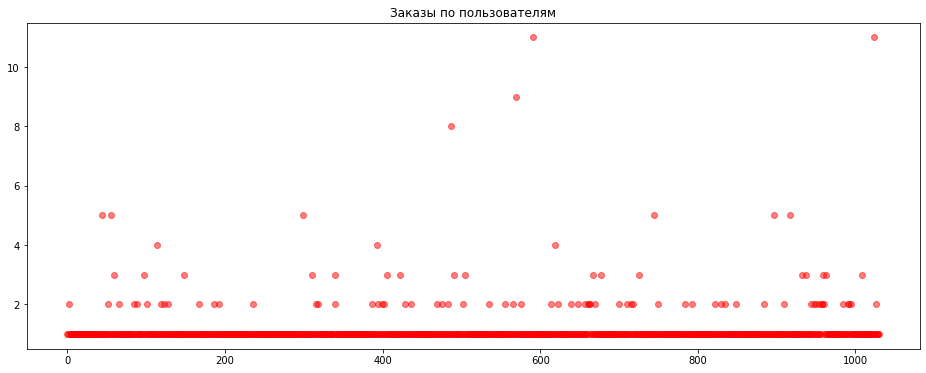

In [19]:
plt.figure(figsize=(16,6))
x_values = pd.Series(range(0,len(orders_by_users)))

# строим точечную диаграмму
plt.scatter(x_values, orders_by_users['orders'], color='red', alpha=0.5)
plt.title('Заказы по пользователям')
plt.show()

Исходя из графиков, большинство пользователей не делают более 2 заказов

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>

Отличный анализ, можно предположить, что граница нормальных и аномальных пользователей проходит примерно на уровне 3-4 заказа на одного пользователя.
<div>


Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [20]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Не более 5% совершали больше 2-х покупок в течение теста. Только 1% - четыре и более покупок.

<div class="alert alert-warning">
<b>Комментарий с небольшим замечанием ревьюера:</b>
    
Согласно заданию, здесь надо выбрать нижнюю границу числа заказов.
 
</div>


<div class="alert alert-info"> <b>
Для установления критерия к аномальным пользователям мы выбрали нижнию границу числа заказов = 2</b> .</div>


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
    
Отлично

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

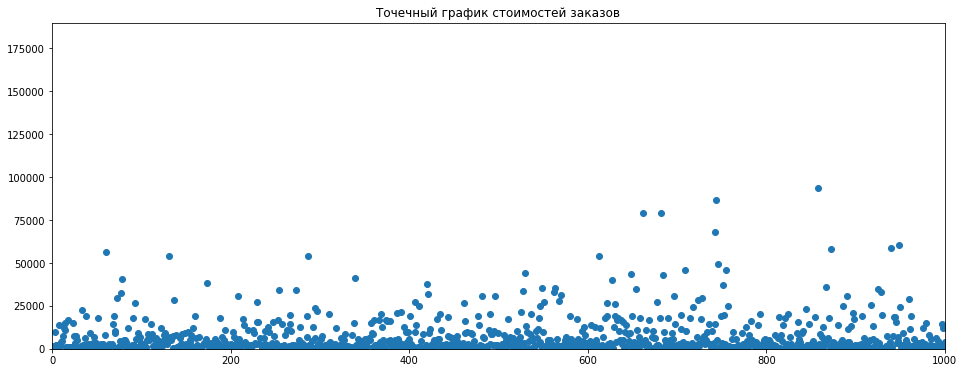

In [21]:
#Изучим стоимость заказов.

x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(16,6))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.axis([0, 1000, 0, 190000])
plt.show()

По графику видно , что большая часть заказов, не превышает 25 000 рублей.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
График построен правильно, видны аномалии. Можно добавить еще один график, ограничив значения по оси Y, чтобы мы могли рассмотреть основную часть заказов. </div>


Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [22]:
print(np.percentile(orders['revenue'] , [95, 99]))

[28000.  58233.2]


Всего 5% заказов дороже 28000 и 1% дороже 58233,2.


<div class="alert alert-warning">
<b>Комментарий с небольшим замечанием ревьюера:</b>
    
Согласно заданию, здесь надо выбрать нижнюю границу стоимости заказов.
 
</div>


<div class="alert alert-info"> <b>
Для установления критерия к аномальным пользователям мы выбрали нижнию границу стоимости заказов = 28 000</b> .</div>


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
    
Отлично

**Анализ статистической значимости**

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

In [23]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
ordersByUsersB.columns = ['visitor_id', 'orders']

print('Покупатели группы A: {}'.format(len(ordersByUsersA)))
print('Покупки А: {}'.format(ordersByUsersA['orders'].sum()))
print('Посетители A: {}\n'.format(visitors[visitors['group']=='A']['visitors'].sum()))

print('Покупатели группы B: {}'.format(len(ordersByUsersB)))
print('Покупки B: {}'.format(ordersByUsersB['orders'].sum()))
print('Посетители B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))



Покупатели группы A: 503
Покупки А: 557
Посетители A: 18736

Покупатели группы B: 586
Покупки B: 640
Посетители B: 18916


<div class="alert alert-danger">
<b>Комментарий с замечанием:</b> 
    
Сформулируй, пожалуйста, нулевую и альтернативную гипотезы.
 
</div>


<div class="alert alert-info"> <b>
Это я посчтиал списки групп, к этому заданию статистическая значимость чуть ниже.
    
Прирост конверсии группы B к группе A: 0.138
P-value: 0.016792355056752608
По "сырым" данным разница статистически значима между групп А и В    </b> .</div>


<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b>
    
Вместе с формулировкой гипотез необходимо задать значение alpha и указать какой метод будешь использовать для проверки гипотез.
</div>


<div class="alert alert-info"> <b>
Для расчета р-value применял напараметрический тест Уилкоксона-Манна-Уитни, так как в анализе были выбросы.
    
Так же формировании нулевой и альтернативную гипотезы.  Порогом статистической значимости устанавливал alpha=0.05</b> .</div>


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
    
Отлично

In [24]:
#составим списки кол-ва заказов sampleA и sampleB по всем пользователям 
list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)

print('\n Прирост конверсии группы B к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))

alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)

print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "сырым" данным разница статистически значима между групп А и В')
else:
    print('По "сырым" данным нет различий в конверсиях между группами А и B')


 Прирост конверсии группы B к группе A: 0.138
P-value: 0.016792355056752608
По "сырым" данным разница статистически значима между групп А и В


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Все верно, молодец, что используешь форматированный вывод.
</div>


Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [25]:
print('Изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "сырым" данным различие в средних чеках в группах A и B статистически значима!')
else:
    print('По "сырым" данным различий в средних чеках в группах A и B нету')

Изменение среднего чека в группе B по отношению группы A: 0.259
P-value: 0.7292909855432458
По "сырым" данным различий в средних чеках в группах A и B нету


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Все верно. 

Если p-value > alpha значит средний чек группы B **равен** среднему чеку группы A (или не отличается). Наблюдаемое различие не значимо, получено случайно из-за единичных выбросов.

</div>


Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [26]:
#для начала установик критерии для поиска аномальных пользователей
max_orders = 2
max_revenue = 28000

#найдем аномальных пользователей
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>max_orders]['visitor_id'], 
                                ordersByUsersB[ordersByUsersB['orders']>max_orders]['visitor_id']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue']>max_revenue]['visitor_id']

anomalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Аномальные пользователей: {}'.format(len(anomalUsers)))

Аномальные пользователей: 74


In [27]:
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(anomalUsers))]['orders'],
    orders_by_non_purchased_users_A
], axis = 0)

sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(anomalUsers))]['orders'],
    orders_by_non_purchased_users_B
], axis = 0)

print('\n Прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "очищенным" данным разница статистически значима между групп А и В')
else:
    print('По "очищенным" данным нет различий в конверсиях между группами А и B!')


 Прирост конверсии группы B по отношению к группе A после очистки данных: 0.173
P-value: 0.013042592743036745
По "очищенным" данным разница статистически значима между групп А и В


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
    
Проверка проведена корректно, согласен группа B лучше группы A на 17.3%.


Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [28]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(anomalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(anomalUsers)))]['revenue'].mean()-1))
       
       
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(anomalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(anomalUsers)))]['revenue'])

print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "очищенным" данным разница в средних чеках в группах A и B статистически значима')
else:
    print('По "очищенным" данным различий в средних чеках в группах A и B нет')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020
P-value: 0.738481751314565
По "очищенным" данным различий в средних чеках в группах A и B нет


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
 
Верно, сильное влияние аномалий.


Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест

Вывод:

Получив данные от интернет-компании в формате CSV, мы загрузили их и приступили к анализу данных. За период работы, была проведена работа по проверке и предобработке данных, а именно были проанализированы и проверены на полноту загруженные данные, изменен формат данных в временных данных, данные были проверены на дубликаты и приведены к одному виду. В последующем мы приоритизировали гипотезы и выбрали топ 5 гипотез по разным фреймворкам. ICE в отличии от RICE не учитывает охват изменений, но это важная оценка гипотезы. Исходя из этого, приоритетными стали гипотезы 7,2,0. После предобработки данных, приступили к A/B тесту. Были построены графики кумулятивной выручки по группам, показывающие нам, что группа B показала большую выручку чем группа А. Построен график кумулятивного среднего чека по группам, который указал нам, на большие заказы и аномальные данные группы В. Изменения  кумулятивного среднего чека группы В к группе А показал нам , что были слишком резкие скачки группы В, что подтверждало гипотезу по аномальным данным. Построив график среднего количества заказов по группам А/B  график показал, что группа В имела большие количества заказов относительно группы А. График относительного изменения среднего кол-ва заказов между группами показал нам, что с С 1 авгста по 5 количество заказов "A" было больше на 5-10% кроме 2 августа - был сильный рост конверсии в группе "B" и по итогу дня результат "B" был на 5% больше "A". А начиная с 6 августа группа "B" лидировала до конца периода. Рост был до 15 августа и разница с "A" на максимуме был 21%, после снизился до 10%-14%. Построив точечный график количества заказов пользователей мы увидили что большинство людей ограничиваются 1 заказом, но были и данные с 11 заказами. Процентили по заказам, дали нам информацию о том, что не более 5% совершали больше 2-х покупок в течение теста и только 1% - четыре и более покупок. По графику стоимостей заказов видно , что большая часть заказов, не превышает 25 000 рублей. По процентилям - Всего 5% заказов дороже 28000 и 1% дороже 58233,2

Анализ статистической значимости показал нам, что:

По "сырым" данным разница статистически значима между групп А и В.

По "сырым" данным различий в средних чеках в группах A и B нету

Количество аномальных пользователей Аномальные пользователей: 74

По "очищенным" данным разница статистически значима между групп А и В

По "очищенным" данным различий в средних чеках в группах A и B нет


Разница показателей конверсии между группами и до, и после очистки данных является СТАТИСТИЧЕСКИ ЗНАЧИМОЙ, и мы можем сделать следующий вывод - мы можем остановить наш A/B тест и зафиксировать победу группы B!

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
    
Решение верное.
    
Хороший аналитический вывод, вынесены основные показатели, которые получены в результате анализа.

Действительно группы равны по среднему чеку, а по среднему количеству заказов группа В лучше группы А.  


<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера

<div class="alert alert-success">

Проделана хорошая аналитическая работа. Код написан чисто, соблюдена структура проекта, графики оформлены корректно и написаны логичные и обоснованные выводы. Проект выполнен на хорошем аналитическом уровне, поэтому замечаний не много. Я отметил в проекте моменты, на которые необходимо обратить внимание, исправь их и проект будет принят.

- по ссылкам ниже интересные материалы по А/В тестам
  
    
https://habr.com/ru/company/avito/blog/571094/

https://habr.com/ru/company/yandex/blog/476826/

https://academy.yandex.ru/journal/kak-provesti-a-b-testirovanie-6-prostykh-shagov

https://habr.com/ru/company/yandex/blog/342704/

https://r-analytics.blogspot.com/2013/10/blog-post_13.html 

</div>

<div class="alert alert-danger">

- добавь, пожалуйста, формулировку нулевой и альтернативной гипотез
</div>




<div class="alert alert-info"> <b>
Станислав, спасибо за дополнительные материалы!</b> .</div>
